* https://thepythoncode.com/article/contour-detection-opencv-python
* https://www.analyticsvidhya.com/blog/2024/07/opencvs-contour-function-a-deep-dive-into-image-processing/
* https://www.learningaboutelectronics.com/Articles/How-to-draw-contours-of-an-image-Python-OpenCV.php

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

In [2]:
ls assets

20250727-115727.jpg  molecule.png      thumbs_up_down.jpg
line_detection.png   sudoku-png-6.png


In [3]:
# load image
image = cv2.imread("assets/molecule.png")

In [4]:
# Converting it to RGB and then grayscale
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

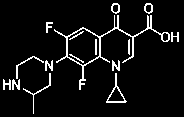

In [5]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
Image.fromarray(binary)

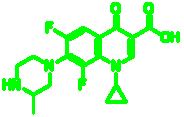

In [6]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
Image.fromarray(image)

In [7]:
# from PIL import Image, ImageDraw

# # Create a new blank image
# img = Image.new('RGB', (200, 200), color = 'white')

# # Create a Draw object
# draw = ImageDraw.Draw(img)

# # Define polygon coordinates
# polygon_coords = [(50, 50), (150, 50), (175, 100), (150, 150), (50, 150), (25, 100)]

# # Draw the polygon with a blue fill and a red outline
# draw.polygon(polygon_coords, fill='blue', outline='red', width=3)
# img

## Drawing External Contours of an Image

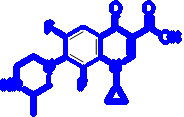

In [8]:
# load image
image = cv2.imread("assets/thumbs_up_down.jpg")
image = cv2.imread("assets/molecule.png")
# Converting it to RGB and then grayscale
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges= cv2.Canny(gray,30,200)
contours, hierarchy= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
Image.fromarray(cv2.drawContours(image, contours, -1, (0,0,255),3))

In [9]:
len(contours)

24

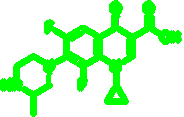

In [10]:
import cv2

image= cv2.imread('assets/molecule.png')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray,30,200)

contours, hierarchy= cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

Image.fromarray(cv2.drawContours(image, contours, -1, (0,255,0),3))

# cv2.imshow('All Contours', image)


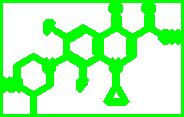

In [11]:
# ref:https://forum.opencv.org/t/how-to-separate-external-and-internal-contour/10513
import cv2

image= cv2.imread('assets/molecule.png')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
Image.fromarray(cv2.drawContours(image, contours, -1, (0,255,0),3))

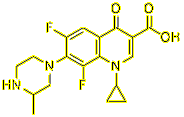

In [12]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('assets/molecule.png')

# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 边缘检测
edges = cv2.Canny(gray, 30, 200)

# 查找轮廓
contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 创建一个图像的副本，用于绘制填充的轮廓
filled_contours = image.copy()

# 填充所有轮廓
# Image.fromarray(cv2.drawContours(filled_contours, contours, -1, (0, 255, 0), thickness=3))
Image.fromarray(cv2.drawContours(image, contours, -1,  (255, 255, 0), -1))

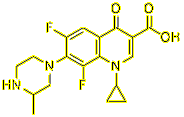

In [14]:
max_contour = max(contours, key=cv2.contourArea)
Image.fromarray(cv2.drawContours(image, contours, -1,  (255, 255, 0), -1))

In [15]:
cv2.contourArea(contours[0])

43.0

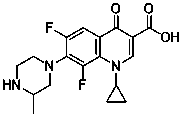

In [16]:
Image.fromarray(threshold)

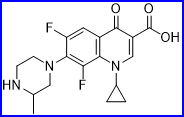

In [17]:


# 凸包
# 1.先找到轮廓
img= cv2.imread('assets/molecule.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)
cnt = contours[0]

# 2.寻找凸包，得到凸包的角点
hull = cv2.convexHull(cnt)

# 3.绘制凸包
# image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
Image.fromarray(cv2.polylines(img, [hull], True, (0, 0, 255), 2))

In [18]:
hull

array([[[183,   0]],

       [[183, 116]],

       [[  0, 116]],

       [[  0,   0]]], dtype=int32)

In [25]:
# ref:https://www.geeksforgeeks.org/python/python-pil-imagedraw-draw-polygon-method/
import math
from PIL import Image, ImageDraw
from PIL import ImagePath 

side = 6
xy = [
    ((math.cos(th) + 1) * 90,
     (math.sin(th) + 1) * 60)
    for th in [i * (2 * math.pi) / side for i in range(side)]
    ]  

image = ImagePath.Path(xy).getbbox()  
size = list(map(int, map(math.ceil, image[2:])))

img = Image.new("RGB", size, "#f9f9f9") 
img1 = ImageDraw.Draw(img)  
img1.polygon(xy, fill ="#eeeeff", outline ="blue") 
img.show()